### **SOW-MKI49-2019-SEM1-V: NeurIPS**

# Project: Skeleton Code

In [254]:
from IPython.display import clear_output
import itertools

In [321]:
import cv2

import matplotlib.pyplot as plt

import numpy as np
import socket
from PIL import Image

class Agent:
    def __init__(self):
        pass

    def step(self, end, reward, state):
        # return 0 # nothing
        # return 1 # left
        # return 2 # right
        return   3 # random

class Environment:
    def __init__(self, ip = "127.0.0.1", port = 13000, size = 768, timescale = 15):
        self.client     = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
        self.ip         = ip
        self.port       = port
        self.size       = size
        self.timescale  = timescale

        self.client.connect((ip, port))

    def reset(self):
        self._send(1, 0)
        return self._receive()

    def step(self, action):
        self._send(2, action)
        return self._receive()

    def state2image(self, state):
        return Image.fromarray(np.array(state, "uint8").reshape(self.size, self.size, 3))

    def _receive(self):
        # Kudos to Jan for the socket.MSG_WAITALL fix!
        data   = self.client.recv(2 + 3 * self.size ** 2, socket.MSG_WAITALL)
        end    = data[0]
        reward = data[1]
        state  = [data[i] for i in range(2, len(data))]

        return end, reward, state

    def _send(self, action, command):
        self.client.send(bytes([action, command]))

In [824]:
img_list = []

In [825]:
import time

In [826]:
def loop():
    
    for i in range(300):
        rec = env.step(3)
        print(rec[:2])
        
        if not i%10:
            clear_output()
        
        if rec[0]!=0:
            if rec[0] == 1:
                time.sleep(2)
                env.reset()
                loop()
            if rec[0]!=1:
                print(rec[0])
                time.sleep(10000)
    return 0

In [827]:
env = Environment()

In [829]:
loop()

(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)


KeyboardInterrupt: 

In [830]:
for i in range(100):
    _ =  env.step(3)
    if i%5==0:
        img_list.append(env.state2image(_[-1]))

KeyboardInterrupt: 

In [832]:
env.reset();

In [55]:
baseline = cv2.imread('/Users/Jose/Downloads/baseline.png')

In [835]:
img_list_arr = []

for i in img_list:
    img_list_arr.append(np.array(i))

In [295]:
a,b,c = img_list_arr[0].shape
print(size)

(768, 768, 3)


In [261]:
canvas_baseline = np.zeros(size)

In [262]:
canvas_baseline[0,0]=[1,1,1]

In [290]:
%%time
for x,y,c in itertools.product([i for i in range(768)],[i for i in range(768)],[i for i in range(3)]):
    values, counts = np.unique([i[x,y][c] for i in img_list_arr ], return_counts = True)
    canvas_baseline[x,y,c] = values[np.argmax(counts)]

CPU times: user 1min 6s, sys: 614 ms, total: 1min 7s
Wall time: 1min 8s


In [313]:
np.random.permutation(len(img_list_arr))[:4]

array([13,  4, 12, 19])

In [833]:
def automatic_background_segmentation(list_imgs):
    
    from itertools import product
    
    dim_x, dim_y, n_channels = list_imgs[0].shape
    
    for x,y,c in product([i for i in range(dim_x)],[i for i in range(dim_y)],[i for i in range(n_channels)]):
        values, counts = np.unique([i[x,y][c] for i in img_list_arr ], return_counts = True)
        canvas_baseline[x,y,c] = values[np.argmax(counts)]
    
    return canvas_baseline.astype(int)

In [836]:
plt.figure(figsize=(10,10))
random_list = [img_list_arr[i] for i in np.random.permutation(len(img_list_arr))[:4]]
background = automatic_background_segmentation(list_imgs=random_list)

<Figure size 720x720 with 0 Axes>

In [837]:
np.all(background == baseline)

True

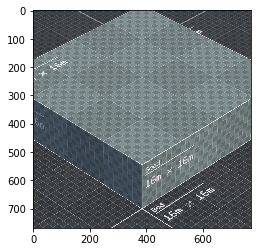

In [838]:
plt.imshow(background)

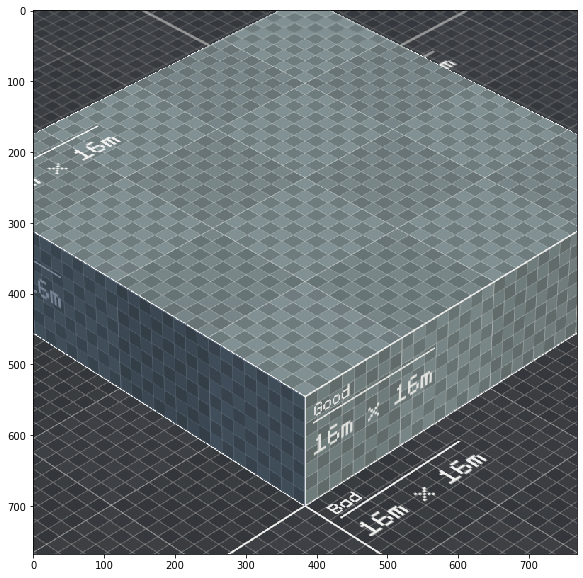

In [291]:
plt.figure(figsize=(10,10))
plt.imshow(canvas_baseline.astype(int))

In [294]:
np.all(baseline == canvas_baseline)

True

In [278]:
values, counts = np.unique([i[171,200][0] for i in img_list_arr ], return_counts = True)

In [279]:
values

array([ 54, 129, 164], dtype=uint8)

In [280]:
counts

array([ 1, 18,  1])

In [281]:
values[np.argmax(counts)]

129

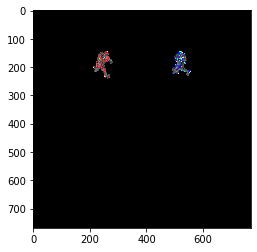

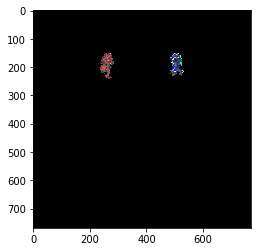

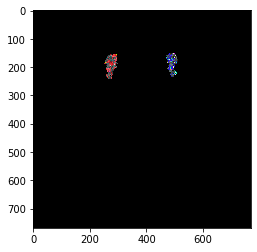

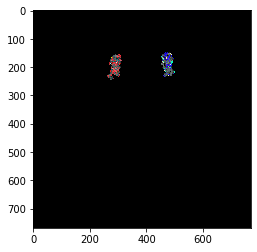

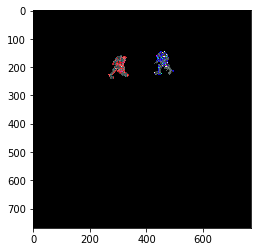

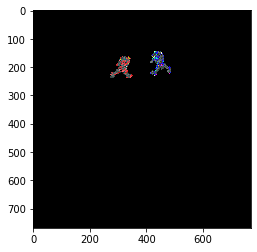

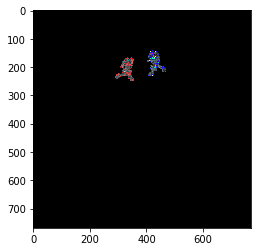

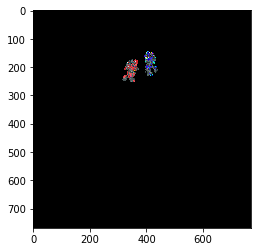

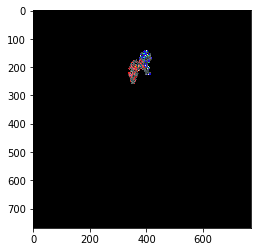

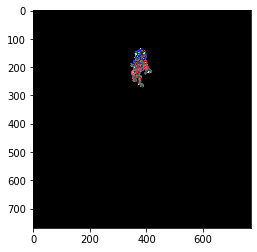

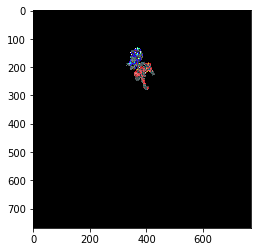

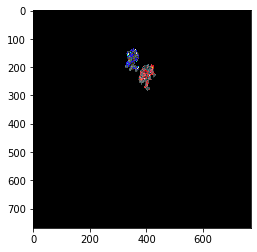

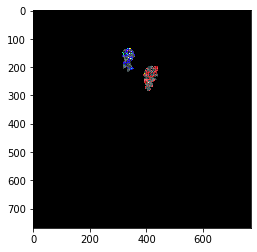

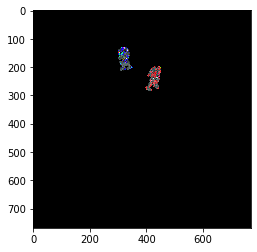

In [841]:
modified_imgs = []
for i in img_list:
    plt.imshow(np.abs(baseline - np.array(i)))
    modified_imgs.append(np.abs(baseline - np.array(i)))
    plt.show()

In [823]:
plt.imshow(modified_imgs[0])

IndexError: list index out of range

In [80]:
modified_imgs[0][0,0]==[0,0,0]

array([ True,  True,  True])

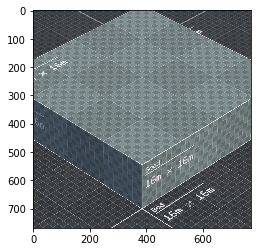

In [166]:
plt.imshow(baseline)

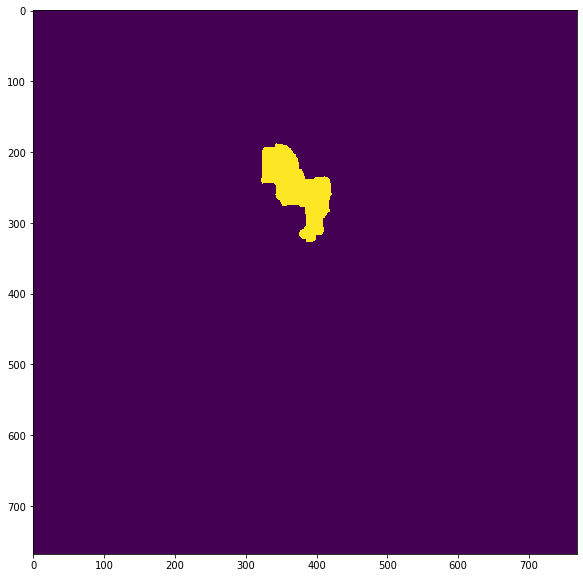

In [117]:
plt.figure(figsize=(10,10))

image = cv2.cvtColor(modified_imgs[-8], cv2.COLOR_RGB2GRAY)
_, image = cv2.threshold(image,1,255,cv2.THRESH_BINARY)
 
kernel = np.ones((5,5), np.uint8)
image = cv2.dilate(image, kernel, iterations = 3)
image = cv2.erode(image, kernel, iterations = 3)


a, b, c = cv2.findContours(image, cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)


if len(b)==1:
        pos = []
    for n, contour in enumerate(b):
        print(n)
        (x,y,w,h) = cv2.boundingRect(contour)
        pos.append(((int(x+w/2), int(y+h/2))))
if len(b)>1:
    None

plt.imshow(image)

In [839]:
def positions(image):
    
    image_original = np.copy(image)
    
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    _, image = cv2.threshold(image,1,255,cv2.THRESH_BINARY)

    kernel = np.ones((5,5), np.uint8)
    image = cv2.dilate(image, kernel, iterations = 3)
    image = cv2.erode(image, kernel, iterations = 3)


    a, contours, c = cv2.findContours(image, cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

    pos = []
    if len(contours)>1:
        dict_red_centers = {}
        for contour in contours:
            (x,y,w,h) = cv2.boundingRect(contour)

            #plt.imshow(image_original[y:y+h,x:x+w,0])
            #plt.show()

            red_value = np.where(image_original[y:y+h,x:x+w,0]!=0)

            agent_crop = image_original[y:y+h,x:x+w,0]

            red_sum = 0
            for x_i, y_i in zip(red_value[0], red_value[1]):
                red_sum += int(agent_crop[x_i, y_i])

            dict_red_centers[red_sum]=(int(x+w/2), int(y+h/2))

        for agent in sorted(dict_red_centers.keys())[::-1]: #red first
            pos.append(dict_red_centers[agent])
            
            
    if len(contours)==1:
        
        image = image_original
        
        a = np.where(image[:,:,0]!=[0])
        values = []
        for i in zip(a[0], a[1]):
            values.append(image[i[0],i[1],0])
        
        
        _, img = cv2.threshold(image[:,:,0], values[-int(len(values)/10)], 255, cv2.THRESH_TOZERO)

        M = cv2.moments(img)
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])

        red_agent = (cX, cY)

        #############
        
        
        a = np.where(image[:,:,2]!=[0])
        values = []
        for i in zip(a[0], a[1]):
            values.append(image[i[0],i[1],2])
            

        _, img = cv2.threshold(image[:,:,2], values[-int(len(values)/10)], 255, cv2.THRESH_TOZERO)

        M = cv2.moments(img)
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])

        blue_agent = (cX, cY)
        
        pos = [red_agent, blue_agent]
        
    return pos


In [840]:
plt.imshow(modified_imgs[0])

IndexError: list index out of range

In [814]:
list((10,10))-[5,5]

TypeError: unsupported operand type(s) for -: 'list' and 'list'

[(248, 194), (521, 189)]


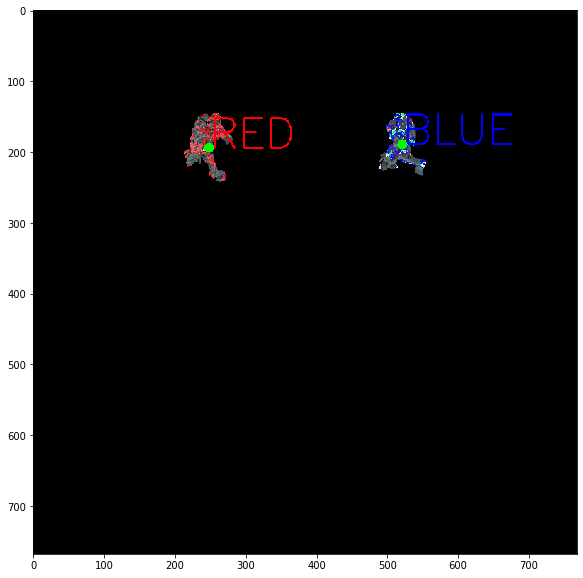

[(261, 197), (507, 191)]


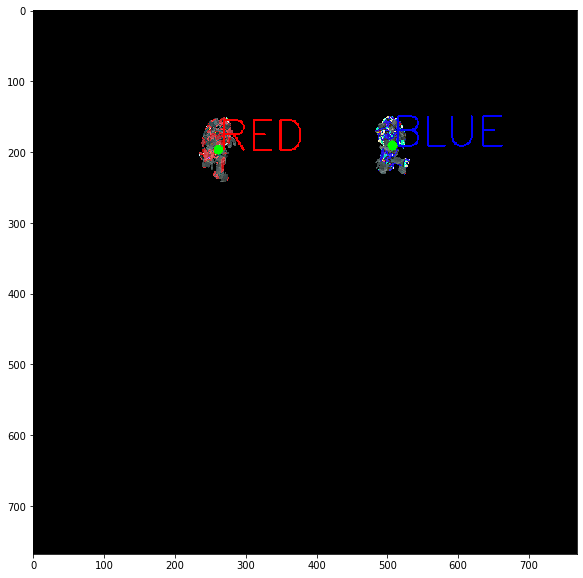

[(274, 199), (488, 193)]


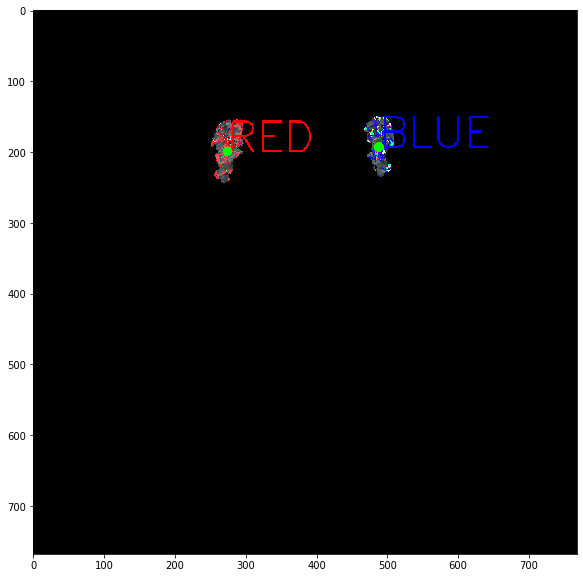

[(286, 200), (475, 191)]


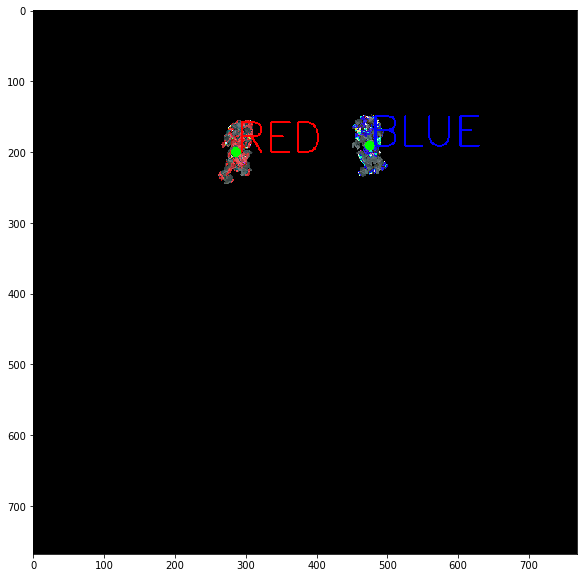

[(301, 201), (461, 188)]


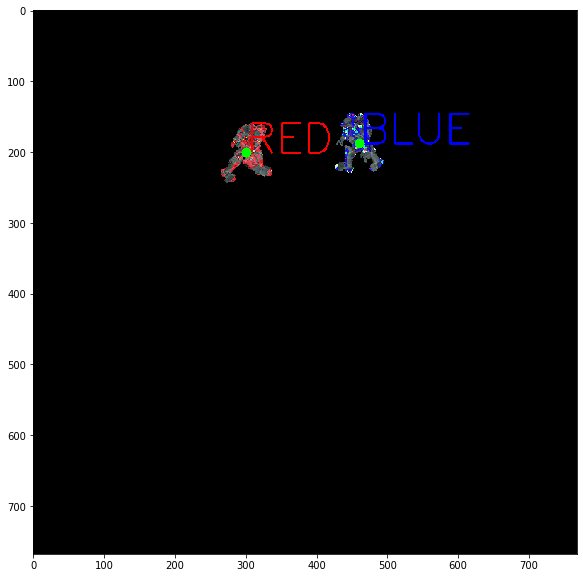

[(311, 200), (449, 187)]


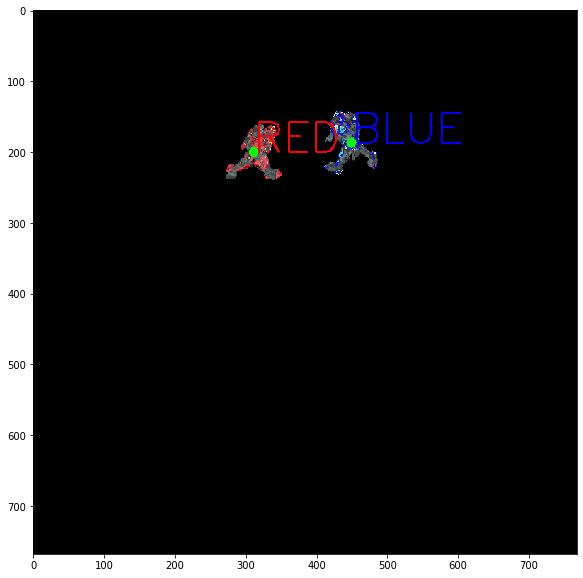

[(322, 209), (434, 187)]


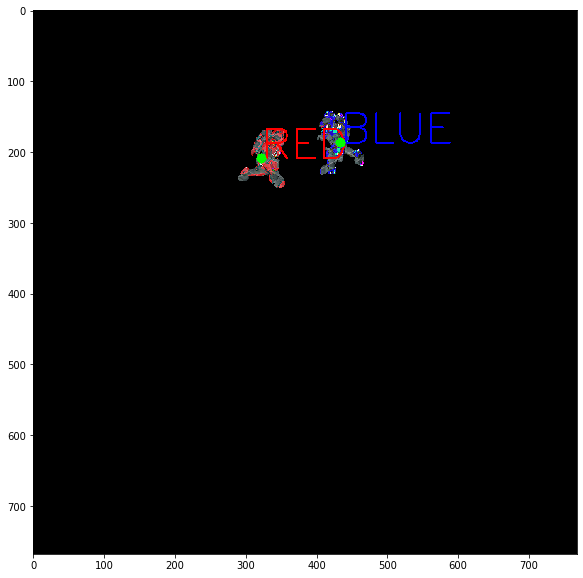

[(344, 214), (415, 188)]


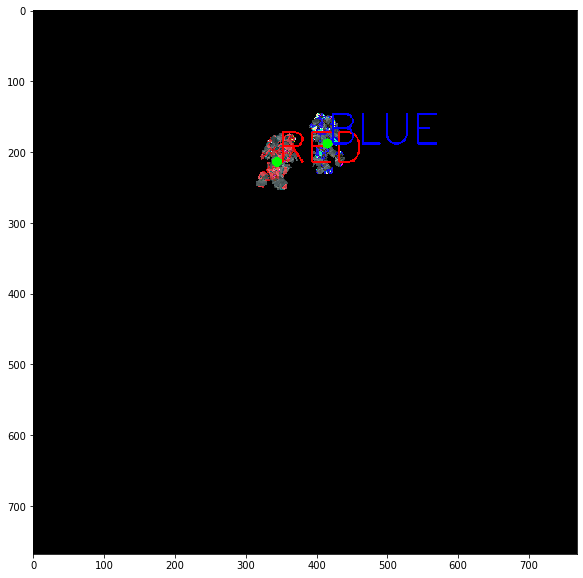

[(370, 202), (380, 193)]


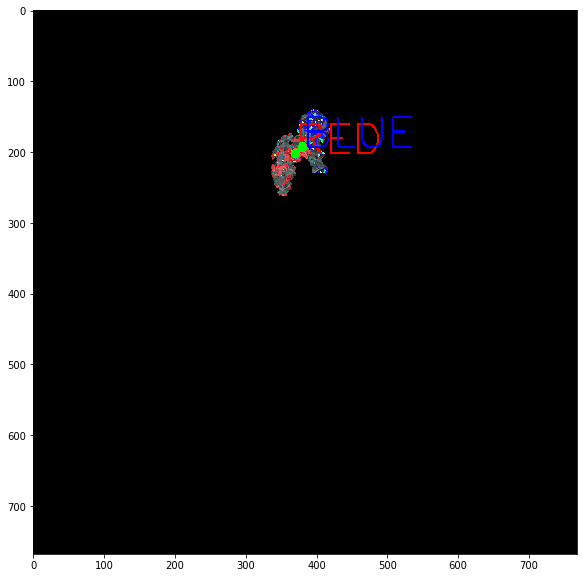

[(376, 204), (375, 189)]


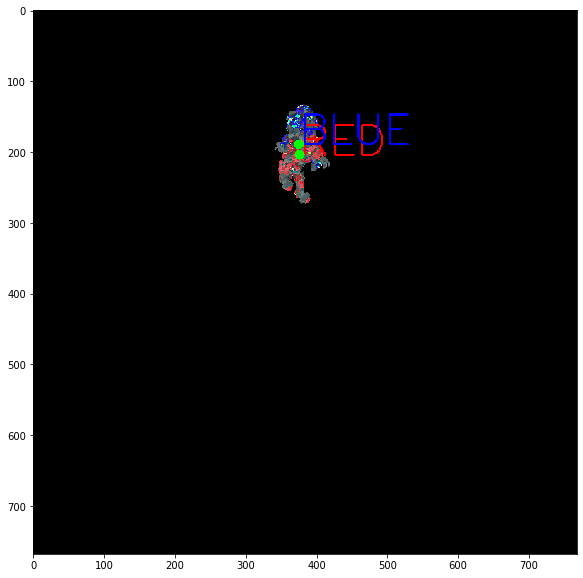

[(385, 211), (372, 192)]


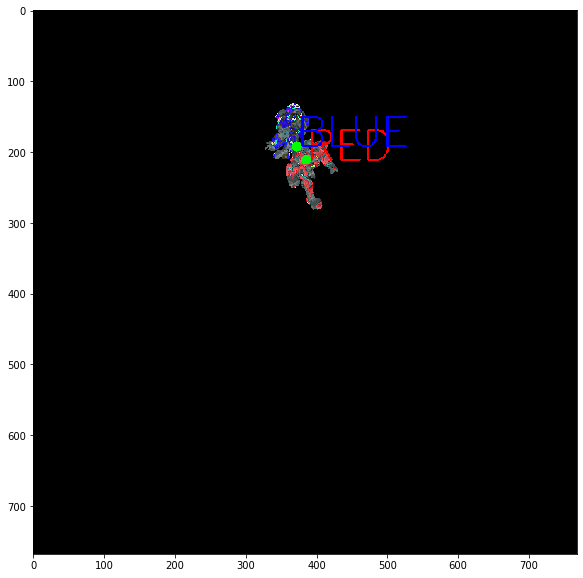

[(385, 214), (366, 194)]


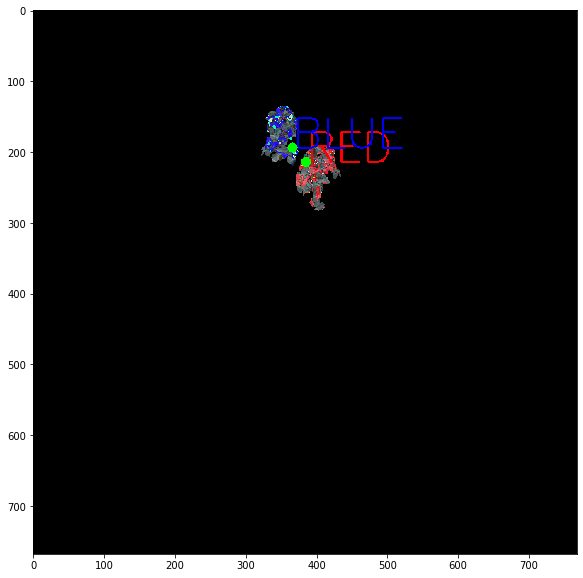

[(415, 240), (336, 176)]


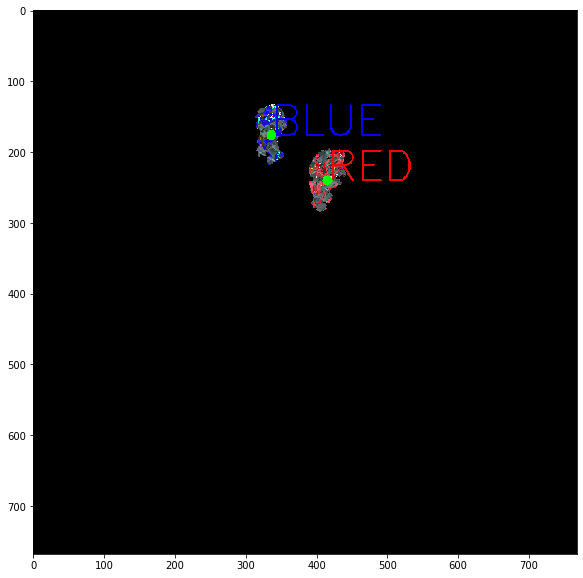

[(424, 242), (324, 172)]


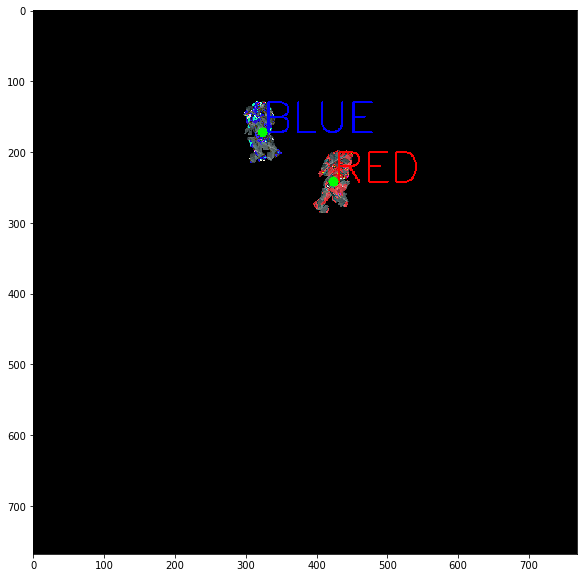

In [857]:
for i in modified_imgs:
    print(positions(i))
    post = positions(i)
    copy = np.copy(i)
    plt.figure(figsize=(10,10))
    cv2.putText(copy, 'RED', org = post[0], color = (255,0,0), fontFace = cv2.FONT_HERSHEY_SIMPLEX, fontScale = 2, thickness = 2)
    cv2.putText(copy, 'BLUE', org = post[1], color = (0,0,255), fontFace = cv2.FONT_HERSHEY_SIMPLEX, fontScale = 2, thickness = 2)
    cv2.circle(copy, post[0], radius = 7, color = (0,255,0), thickness = -1)
    cv2.circle(copy, post[1], radius = 7, color = (0,255,0), thickness = -1)
    plt.imshow(copy)
    plt.show()

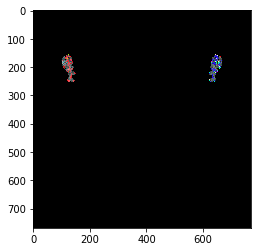

In [776]:
plt.imshow(modified_imgs[0])

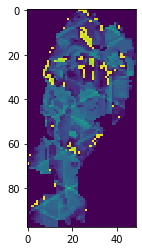

1


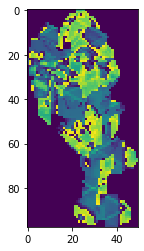

2
337196
190722
[(125, 205), (643, 205)]


In [803]:
image = np.copy(modified_imgs[0])
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
_, image = cv2.threshold(image,1,255,cv2.THRESH_BINARY)

kernel = np.ones((5,5), np.uint8)
image = cv2.dilate(image, kernel, iterations = 3)
image = cv2.erode(image, kernel, iterations = 3)


a, contours, c = cv2.findContours(image, cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

pos = []
if len(contours)>1:
    dict_red_centers = {}
    for contour in contours:
        (x,y,w,h) = cv2.boundingRect(contour)
        
        plt.imshow(modified_imgs[0][y:y+h,x:x+w,0])
        plt.show()
        
        red_value = np.where(modified_imgs[0][y:y+h,x:x+w,0]!=0)
        
        agent_crop = modified_imgs[0][y:y+h,x:x+w,0]
        
        red_sum = 0
        for x_i, y_i in zip(red_value[0], red_value[1]):
            red_sum += int(agent_crop[x_i, y_i])
        
        dict_red_centers[red_sum]=(int(x+w/2), int(y+h/2))
        
    for agent in sorted(dict_red_centers.keys())[::-1]: #red first
        print(agent)
        pos.append(dict_red_centers[agent])
            
print(pos)

In [798]:
sorted(dict_red_centers.keys())[::-1]

[337196, 190722]

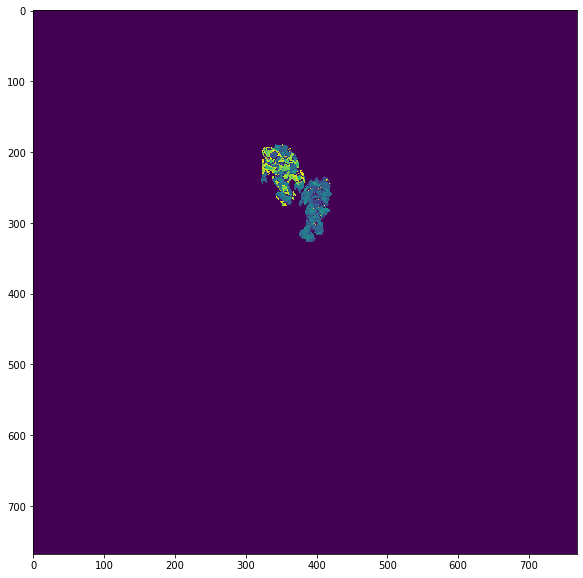

([array([768.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([768.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([768.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([768.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([768.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([768.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([768.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([768.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([768.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([768.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([768.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([768.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([768.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([768.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  arra

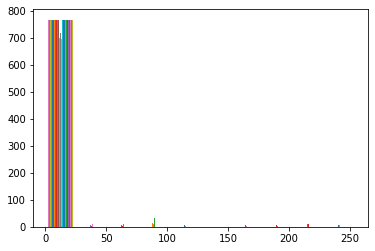

In [165]:
image = np.copy(modified_imgs[0])
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
_, image = cv2.threshold(image,1,255,cv2.THRESH_BINARY)

kernel = np.ones((5,5), np.uint8)
image = cv2.dilate(image, kernel, iterations = 3)
image = cv2.erode(image, kernel, iterations = 3)


a, contours, c = cv2.findContours(image, cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

pos = []
if len(contours)>1:
    dict_red_centers = {}
    for contour in contours:
        (x,y,w,h) = cv2.boundingRect(contour)
        
        plt.imshow(modified_imgs[0][y:y+h,x:x+w,0])
        plt.show()
        
        red_value = np.where(modified_imgs[0][y:y+h,x:x+w,0]!=0)
        
        agent_crop = modified_imgs[0][y:y+h,x:x+w,0]
        
        red_sum = 0
        for x,y in zip(red_value[0], red_value[1]):
            red_sum += agent_crop[x,y])
        
        dict_red_centers[red_value]=(int(x+w/2), int(y+h/2))
        
        #pos.append(((int(x+w/2), int(y+h/2))))
print(dict_red_centers)

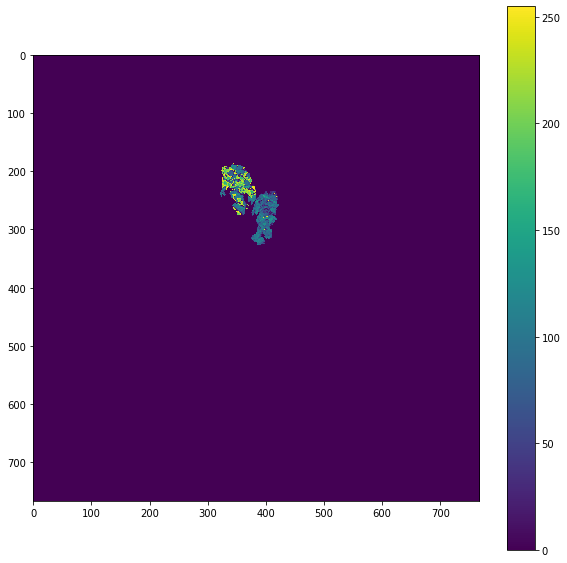

In [635]:
plt.figure(figsize=(10,10))
plt.imshow(modified_imgs[-8][:,:,2])
plt.colorbar()

a = np.where(modified_imgs[-8][:,:,2]!=[0])

In [644]:
a = np.where(modified_imgs[-8][:,:,2]!=[0])
values = []
for i in zip(a[0], a[1]):
    values.append(image[i[0],i[1],2])

In [657]:
print(len(values))
sorted(values)
values[int(len(values)/1.1)]

6076


103

361 238


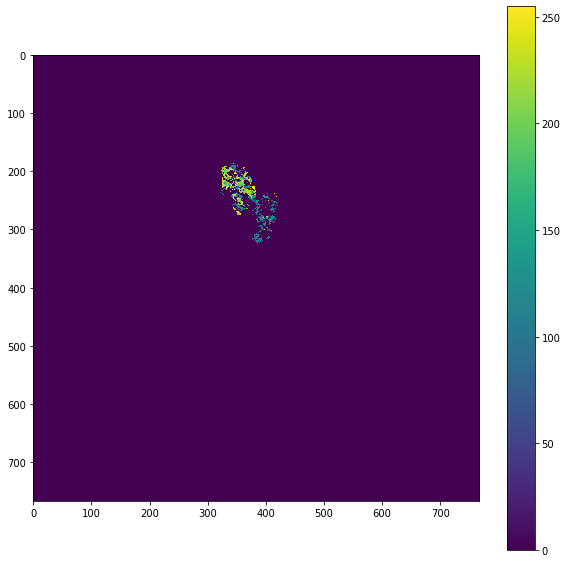

In [734]:
plt.figure(figsize=(10,10))
_, img = cv2.threshold(modified_imgs[-8][:,:,2], values[-int(len(values)/10)], 255, cv2.THRESH_TOZERO)


M = cv2.moments(img)
cX = int(M["m10"] / M["m00"])
cY = int(M["m01"] / M["m00"])

print(cX,cY)

plt.imshow(img)
plt.colorbar()
plt.show()

In [737]:
np.where(img!=0)

(array([188, 189, 190, ..., 325, 326, 327]),
 array([344, 352, 342, ..., 386, 385, 385]))

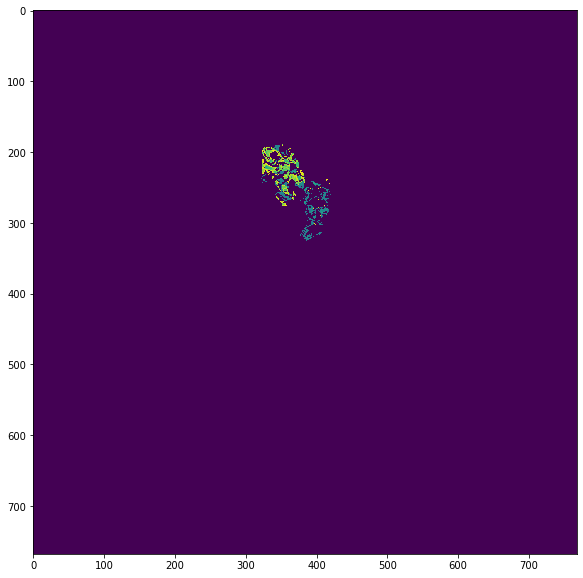

In [735]:
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

In [714]:
def average_value(img):
    color = np.where(img != 0)
    print(len(color[0]))

In [715]:
average_value(img)

3280


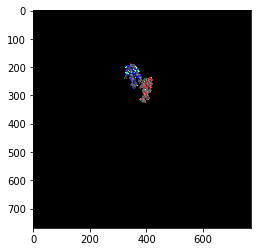

In [746]:
plt.imshow(modified_imgs[-8])

361 238


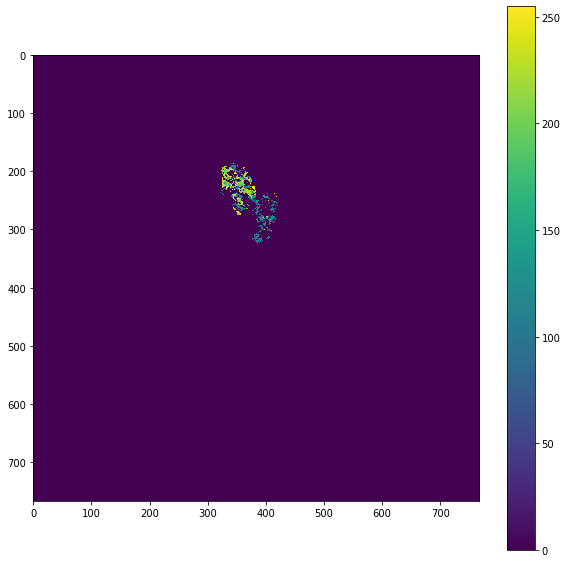

In [745]:
plt.figure(figsize=(10,10))
_, img = cv2.threshold(modified_imgs[-8][:,:,2], values[-int(len(values)/10)], 255, cv2.THRESH_TOZERO)


M = cv2.moments(img)
cX = int(M["m10"] / M["m00"])
cY = int(M["m01"] / M["m00"])

print(cX,cY)

non_zero = np.where(img!=0)


red_agent = (cX, cY)

plt.imshow(img)
plt.colorbar()
plt.show()

391 267


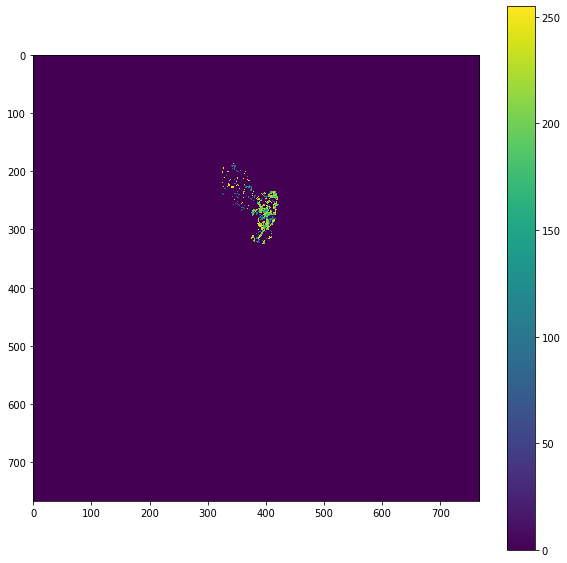

In [744]:
def single_blob(img):
    _, img = cv2.threshold(img[:,:,0], values[-int(len(values)/10)], 255, cv2.THRESH_TOZERO)

    M = cv2.moments(img)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])

    red_agent = (cX, cY)

    #############

    _, img = cv2.threshold(img[:,:,2], values[-int(len(values)/10)], 255, cv2.THRESH_TOZERO)

    M = cv2.moments(img)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])

    blue_agent = (cX, cY)


    return [red_agent, blue_agent]

In [741]:
plt.figure(figsize=(10,10))

mf = np.copy(modified_imgs[-8])


ret3,th3 = cv.threshold(mf,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)


M = cv2.moments(modified_imgs[-8][:,:,0])
cX = int(M["m10"] / M["m00"])
cY = int(M["m01"] / M["m00"])

print(cX, cY)
cv2.circle(mf, (cX, cY), 4, (0,255,0), cv2.FILLED)

M = cv2.moments(modified_imgs[-8][:,:,2])
cX = int(M["m10"] / M["m00"])
cY = int(M["m01"] / M["m00"])
print(cX, cY)
cv2.circle(mf, (cX, cY), 4, (0,255,0), cv2.FILLED)

plt.imshow(mf)

NameError: name 'cv' is not defined

<Figure size 720x720 with 0 Axes>

In [142]:
for i in range(a[0].shape):
    modified_imgs[a[0][i],a[1][1]]

(6076,)

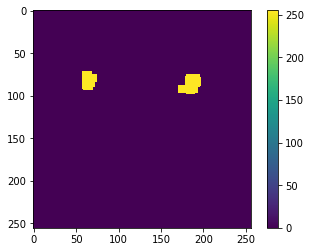

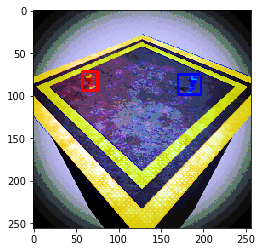

---


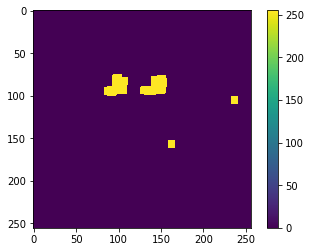

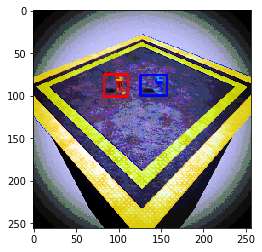

---


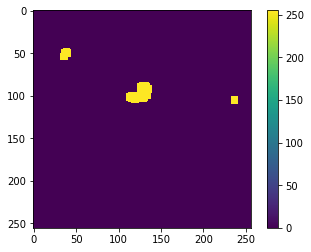

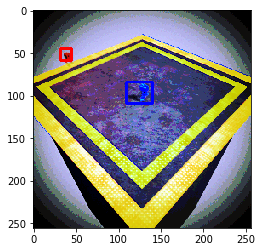

---


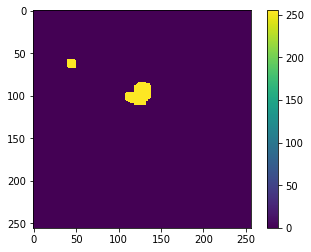

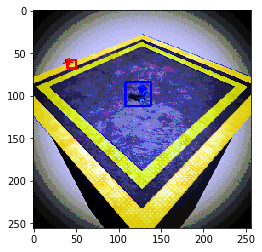

---


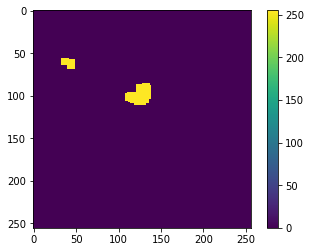

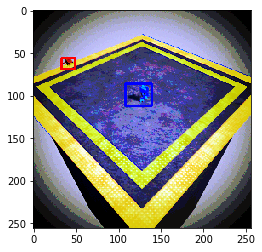

---


In [15]:
for i in img_list:
    #plt.imshow(cv2.cvtColor(i,cv2.COLOR_BGR2GRAY)-cv2.cvtColor(base,cv2.COLOR_BGR2GRAY))
    #plt.show()
    #minus = np.abs(cv2.bilateralFilter(i[:,:,1],7, 75, 75)-cv2.bilateralFilter(base[:,:,1],7,75,75))
    minus = np.abs(i[:,:,1]-base[:,:,1])
    #minus = np.abs(i[:,:,0]-base[:,:,0])
    #minus = np.abs(i[:,:,2]-base[:,:,2])
    #plt.imshow(minus)
    
    #print(np.where((minus >= 170) & (minus <= 220)))
    
    canvas = np.zeros((256,256))
    
    canvas[np.where((minus >= 200) & (minus <= 220))] = 200
    
    
    kernel = np.ones((5,5), np.uint8)
    
    canvas = cv2.dilate(canvas, kernel, iterations = 3)
    canvas = cv2.erode(canvas, kernel, iterations = 1)
    
    canvas = cv2.threshold(canvas, 126, 255, cv2.THRESH_BINARY) 
    
    
    a, b, c = cv2.findContours(np.uint8(canvas[1]), cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
    
    #print(a, b)
    
    #cv2.drawContours(np.zeros((256,256)), b, -1, (0,124,0), 1)
    
    #plt.imshow(i)
    #plt.show()
    plt.imshow(a)
    plt.colorbar()
    plt.show()
    
    i2 = i.copy()
    
    cont_area = [cv2.contourArea(contour) for contour in b]
    #print(sorted(cont_area))
    biggest_2_area = sorted(cont_area)[-2:][::-1]
    #print(biggest_2_area)
    
    contour_select = {}
    
    for contour in b:
        (x,y,w,h) = cv2.boundingRect(contour)
        #plt.imshow(i[y:y+h,x:x+w][:,:,2])
        #plt.show()
        #print(np.mean(i[y:y+h,x:x+w][:,:,2]))
        #print(cv2.contourArea(contour))
        
        if cv2.contourArea(contour) in biggest_2_area:
            contour_select[cv2.contourArea(contour)] = np.mean(i[y:y+h,x:x+w][:,:,2])
    
    #print(contour_select)
    
    for contour in b:
        (x,y,w,h) = cv2.boundingRect(contour)
        
       # print('######',cv2.contourArea(contour), contour_select[cv2.contourArea(contour)])
       # print(max([contour_select[i] for i in contour_select])== contour_select[cv2.contourArea(contour)])
        
        if cv2.contourArea(contour) in contour_select:
            if max([contour_select[i] for i in contour_select]) == contour_select[cv2.contourArea(contour)]:
                #print('Max')
                cv2.rectangle(i2, (x,y), (x+w,y+h), (0, 0, 255), 2)
            else:
                #print('No max')
                cv2.rectangle(i2, (x,y), (x+w,y+h), (255, 0, 0), 2)
                
    
    plt.imshow(i2)
    plt.show()
    
    
    print('---')
    

In [118]:
pos = []
for n, contour in enumerate(b):
    print(n)
    (x,y,w,h) = cv2.boundingRect(contour)
    pos.append(((int(x+w/2), int(y+h/2))))

0


(372, 258)


/Users/Jose/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  This is separate from the ipykernel package so we can avoid doing imports until


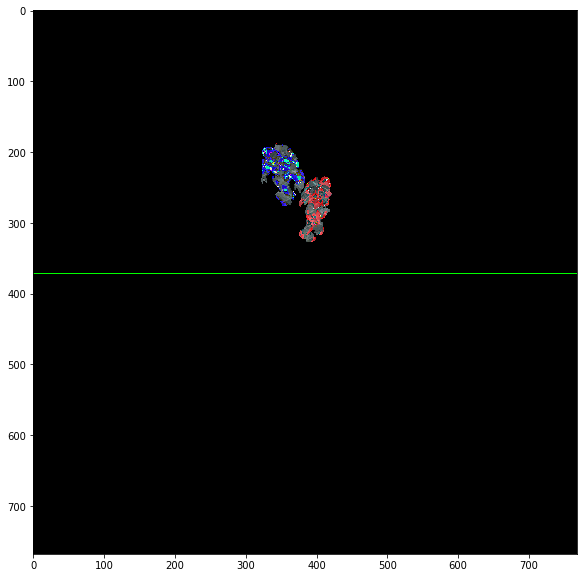

In [126]:
for p in pos:
    print(p)
    modified_imgs[-8][pos]=[0,255,0]
plt.figure(figsize=(10,10))
plt.imshow(modified_imgs[-8])

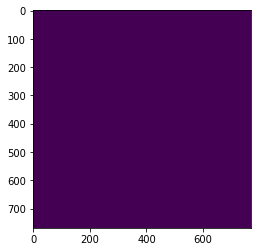

In [78]:
canvas = np.zeros((768, 768))
    
canvas[np.all(np.where((modified_imgs[0] != [0,0,0])))] = 255



plt.imshow(canvas)

In [110]:
modified_imgs[0].shape

(768, 768, 3)

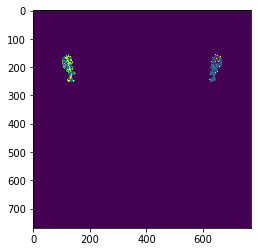

In [159]:
plt.imshow(modified_imgs[0][:,:,0])

cv2.threshold(modified_imgs[0], 126, 255, cv2.THRESH_BINARY) 

canvas = np.float32(modified_imgs[0][:,:,2])

canvas = cv2.threshold(canvas, 150, 255, cv2.THRESH_BINARY)

canvas = canvas[1]


kernel = np.ones((5,5), np.uint8)

canvas = cv2.erode(canvas, kernel, iterations = 1)
canvas = cv2.dilate(canvas, kernel, iterations = 5)


a, b, c = cv2.findContours(np.uint8(canvas), cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
for i in range

In [171]:
mod.shape

(768, 768, 3)

In [169]:
mod = modified_imgs[0]
for i in b[0]:
    print(i[0])
    mod[]=(0,255,0)

151
171
172
172
173
175
176
176
179
180
200
200
201
204
205
204
204
215
216
216
236
236
226
225
225
213
212
212
192
192
191
176
175
174
174
173
159
158
151


In [157]:

x,y,w,h = cv2.boundingRect()

TypeError: Expected cv::UMat for argument 'array'

In [149]:
print(x,y,w,h)

0 0 0 0


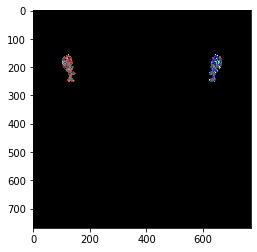

In [154]:
plt.imshow(cv2.rectangle(modified_imgs[0],(x,y), (x+w,y+h), (0,255,0),2))

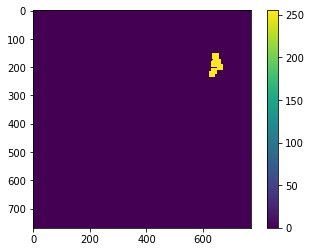

In [137]:
plt.colorbar()
plt.imshow(canvas)

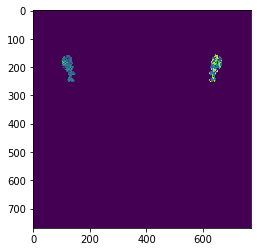

In [115]:
plt.imshow(modified_imgs[0][:,:,2])

In [107]:
cv2.threshold(modified_imgs[0][],)

TypeError: Required argument 'thresh' (pos 2) not found

In [106]:
cv2.findContours(np.uint8(modified_imgs[0]), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

error: OpenCV(3.4.6) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/contours.cpp:197: error: (-210:Unsupported format or combination of formats) [Start]FindContours supports only CV_8UC1 images when mode != CV_RETR_FLOODFILL otherwise supports CV_32SC1 images only in function 'cvStartFindContours_Impl'


In [98]:
_ =   cv2.findContours(modified_imgs, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

TypeError: Expected cv::UMat for argument 'image'

In [7]:
class NeurosmashAgent:
    def __init__(self):
        pass

    def step(self, info, reward, state):
        #return 0 # no action
        #return 1 # left action
        #return 2 # right action
        #return 3 # built-in random action
        return 4 # built-in ai action

In [8]:
import random
import socket
import struct

class NeurosmashEnvironment:
    def __init__(self, ip = "127.0.0.1", port = 13000):
        self.client = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
        self.ip     = ip
        self.port   = port

        self.client.connect((ip, port))

    def init(self):
        self._send(0, 1)
        return self._receive()

    def step(self, action):
        self._send(action, 2)
        return self._receive()

    def _receive(self):
        data   = self.client.recv(1 + 1 + 256 * 256 * 3)
        info   = data[0]
        reward = data[1]
        state  = [data[i] for i in range(2, len(data))]
        return info, reward, state

    def _send(self, action, transition):
        self.client.send(bytes([action, transition]))

In [9]:
agent       = NeurosmashAgent()
environment = NeurosmashEnvironment()

In [10]:
info, reward, state = environment.init()

IndexError: index out of range

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL.ImageOps import equalize, autocontrast
from PIL import Image

In [6]:
state_list = []

In [7]:
action = agent.step(info, reward, state)
for i in range(1000):
    info, reward, state = environment.step(action)
    if len(state) == 3*256*256:
        state_list.append(state)
    if reward == 1:
        break

In [8]:
len(state_list)

5

In [9]:
import pickle

In [127]:
#pickle.dump({'state_list':state_list, 'img_list':img_list}, open( "NIPS_imgs.pickle", "wb" ) )

In [134]:
dict_vars = pickle.load(open('NIPS_imgs.pickle', 'rb'))
dict_vars.keys()
state_list = dict_vars['state_list']
img_list = dict_vars['img_list']

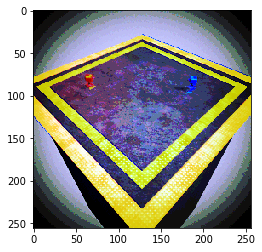

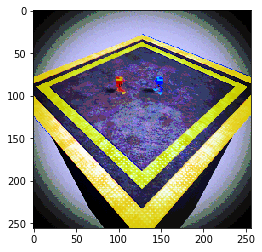

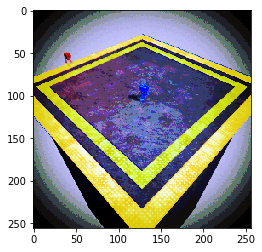

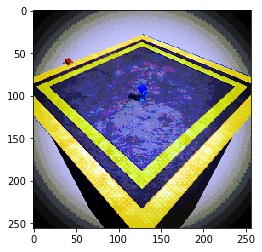

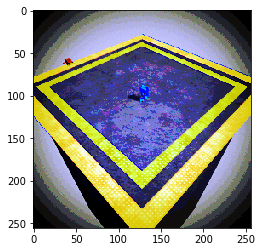

In [12]:
img_list = []
for sl in state_list:
    img = np.array(sl).reshape(3,256,256).transpose(1,2,0)[::-1]

    b, g, r = cv2.split(img)

    r = Image.fromarray(np.uint8(r))
    r = equalize(r)
    #r = autocontrast(r)
    r = np.array(r)

    g = Image.fromarray(np.uint8(g))
    g = equalize(g)
    #g = autocontrast(g)
    g = np.array(g)

    b = Image.fromarray(np.uint8(b))
    b = equalize(b)
    #b = autocontrast(b)
    b = np.array(b)

    img = cv2.merge((b,g,r))

    plt.imshow(img)
    img_list.append(img)
    plt.show()

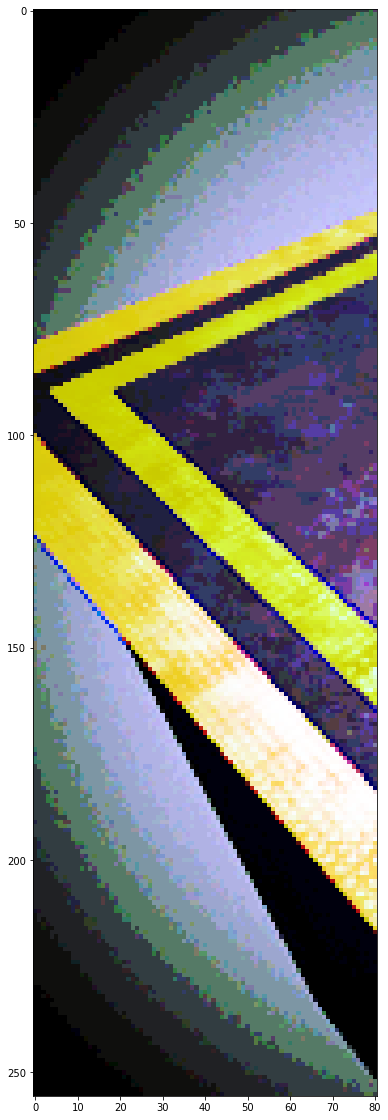

In [5]:
plt.figure(figsize=(20,20))
plt.imshow(img_list[-2][:,:81,:])

In [6]:
plt.figure(figsize=(20,20))
base = np.hstack((img_list[-2][:,:81,:],img_list[0][:,81:160,:],img_list[2][:,160:,:]))
#cv2.imwrite('ring.png', base)

<Figure size 1440x1440 with 0 Axes>

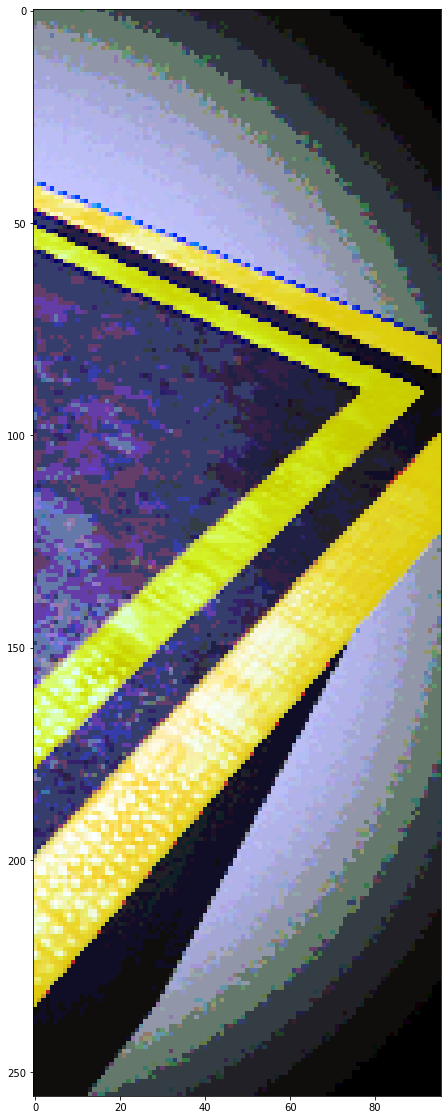

In [7]:
plt.figure(figsize=(20,20))
plt.imshow(img_list[2][:,160:,:])

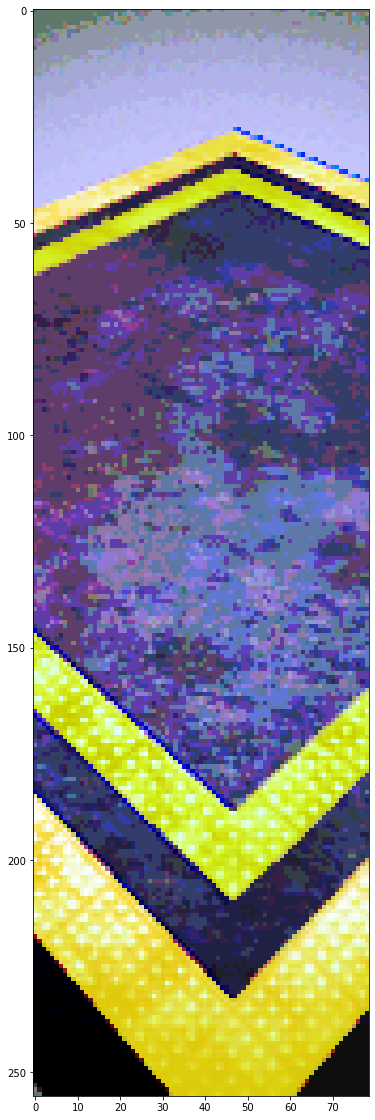

In [8]:
plt.figure(figsize=(20,20))
plt.imshow(img_list[0][:,81:160,:])

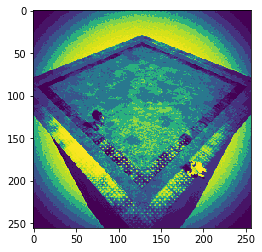

In [9]:
plt.imshow(r)

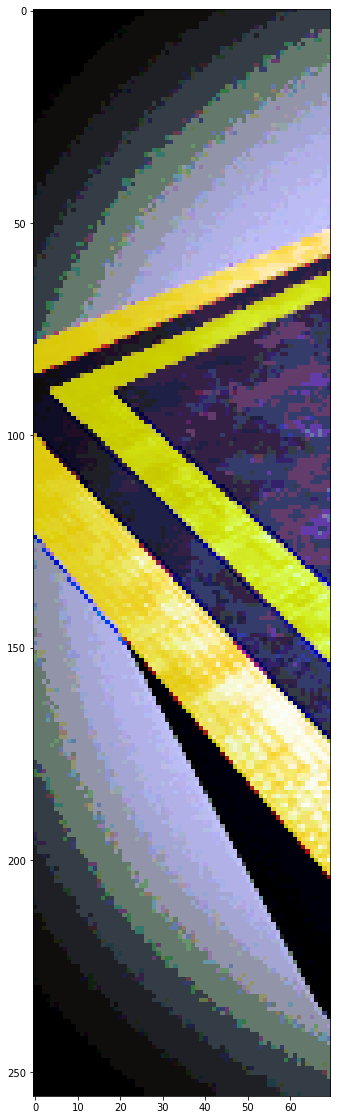

In [10]:
plt.figure(figsize = (20,20))
plt.imshow(img_list[1][:,0:70,:])

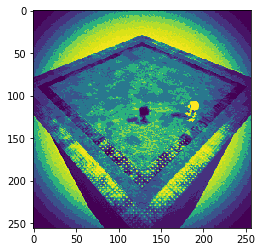

In [103]:
plt.imshow(img_list[4][:,:,2])

In [14]:
base = cv2.imread('ring.png')

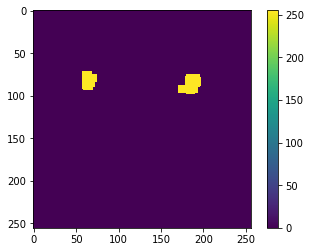

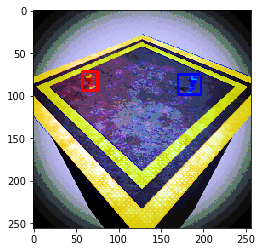

---


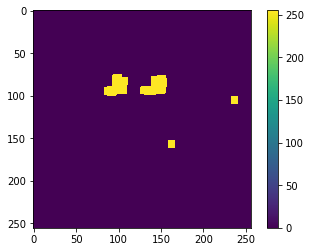

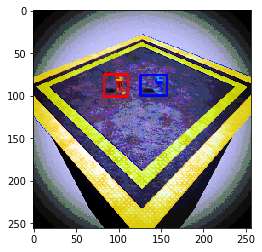

---


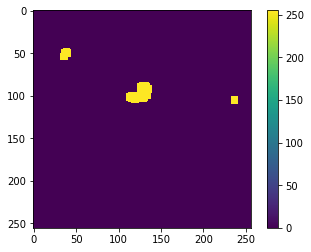

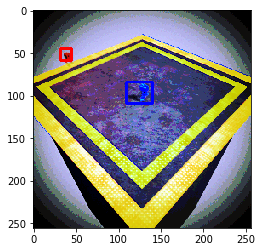

---


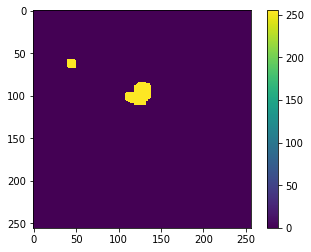

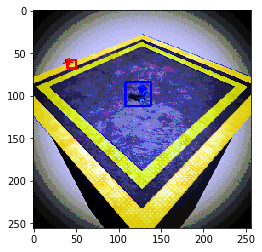

---


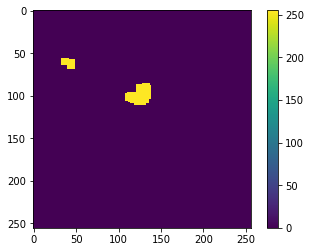

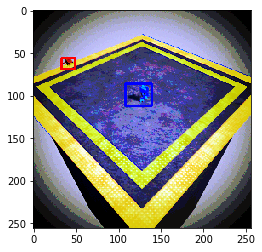

---


In [15]:
for i in img_list:
    #plt.imshow(cv2.cvtColor(i,cv2.COLOR_BGR2GRAY)-cv2.cvtColor(base,cv2.COLOR_BGR2GRAY))
    #plt.show()
    #minus = np.abs(cv2.bilateralFilter(i[:,:,1],7, 75, 75)-cv2.bilateralFilter(base[:,:,1],7,75,75))
    minus = np.abs(i[:,:,1]-base[:,:,1])
    #minus = np.abs(i[:,:,0]-base[:,:,0])
    #minus = np.abs(i[:,:,2]-base[:,:,2])
    #plt.imshow(minus)
    
    #print(np.where((minus >= 170) & (minus <= 220)))
    
    canvas = np.zeros((256,256))
    
    canvas[np.where((minus >= 200) & (minus <= 220))] = 200
    
    
    kernel = np.ones((5,5), np.uint8)
    
    canvas = cv2.dilate(canvas, kernel, iterations = 3)
    canvas = cv2.erode(canvas, kernel, iterations = 1)
    
    canvas = cv2.threshold(canvas, 126, 255, cv2.THRESH_BINARY) 
    
    
    a, b, c = cv2.findContours(np.uint8(canvas[1]), cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
    
    #print(a, b)
    
    #cv2.drawContours(np.zeros((256,256)), b, -1, (0,124,0), 1)
    
    #plt.imshow(i)
    #plt.show()
    plt.imshow(a)
    plt.colorbar()
    plt.show()
    
    i2 = i.copy()
    
    cont_area = [cv2.contourArea(contour) for contour in b]
    #print(sorted(cont_area))
    biggest_2_area = sorted(cont_area)[-2:][::-1]
    #print(biggest_2_area)
    
    contour_select = {}
    
    for contour in b:
        (x,y,w,h) = cv2.boundingRect(contour)
        #plt.imshow(i[y:y+h,x:x+w][:,:,2])
        #plt.show()
        #print(np.mean(i[y:y+h,x:x+w][:,:,2]))
        #print(cv2.contourArea(contour))
        
        if cv2.contourArea(contour) in biggest_2_area:
            contour_select[cv2.contourArea(contour)] = np.mean(i[y:y+h,x:x+w][:,:,2])
    
    #print(contour_select)
    
    for contour in b:
        (x,y,w,h) = cv2.boundingRect(contour)
        
       # print('######',cv2.contourArea(contour), contour_select[cv2.contourArea(contour)])
       # print(max([contour_select[i] for i in contour_select])== contour_select[cv2.contourArea(contour)])
        
        if cv2.contourArea(contour) in contour_select:
            if max([contour_select[i] for i in contour_select]) == contour_select[cv2.contourArea(contour)]:
                #print('Max')
                cv2.rectangle(i2, (x,y), (x+w,y+h), (0, 0, 255), 2)
            else:
                #print('No max')
                cv2.rectangle(i2, (x,y), (x+w,y+h), (255, 0, 0), 2)
                
    
    plt.imshow(i2)
    plt.show()
    
    
    print('---')
    

In [32]:
data = cv2.cvtColor(img_list[4],cv2.COLOR_BGR2GRAY)-cv2.cvtColor(base,cv2.COLOR_BGR2GRAY)

#plt.imshow(img_list[4][:,:,0]-img_list[6][:,:,0])
#plt.show()
#plt.imshow(img_list[4][:,:,1]-img_list[6][:,:,1])


#kernel = np.ones((2,2),np.uint8)
#img2 = cv2.dilate(cv2.erode(img_list[1][:,:,1]-base, kernel),  kernel)
#plt.imshow(cv2.morphologyEx(img2, cv2.MORPH_OPEN, kernel))
plt.show()

#plt.imshow(img_list[4][:,:,2]-img_list[6][:,:,2])
#plt.show()

ValueError: operands could not be broadcast together with shapes (256,256) (256,256,3) 

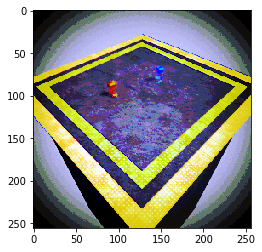

In [58]:
plt.imshow(img_list[4])

In [59]:
b, g, r = cv2.split(img_list[4])

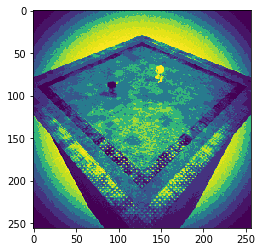

In [60]:
plt.imshow(r)

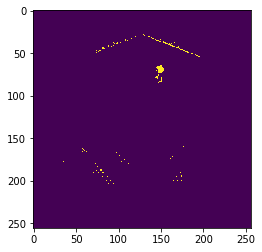

In [61]:
plt.imshow(np.where(r >= 254, 1, 0))

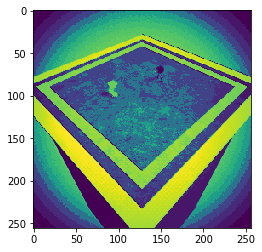

In [67]:
plt.imshow(b)

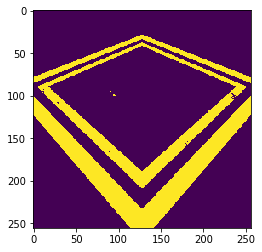

In [69]:
plt.imshow(np.where(b >= 200, 1, 0))

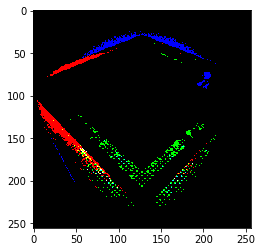

In [86]:
plt.imshow(cv2.threshold(img_list[4], 250, 255, cv2.THRESH_BINARY)[1])

In [ ]:
for e, i in enumerate(img_list):
    cv2.imwrite('agent-'+str(e)+'.png', i)

In [ ]:
for e, i in enumerate(img_list):
    cv2.imwrite('agent-'+str(e)+'.png', i)